In [64]:
# %matplotlib widget

from __future__ import annotations

import re
from collections import defaultdict
from dataclasses import dataclass, field
from itertools import permutations, product
from math import inf
from random import choice

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import numpy.typing as npt
from mpl_toolkits.mplot3d import axes3d
from numpy import int_, object_
from numpy.typing import NDArray
from test_utilities import run_tests_params
from util import print_hex

COLORS = list(mcolors.CSS4_COLORS.keys())

<link href="style.css" rel="stylesheet"></link>
<article class="day-desc read-aloud"><h2>--- Day 8: Space Image Format ---</h2><p><span title="I'm not sorry.">The Elves' spirits are lifted when they realize you have an opportunity to reboot one of their Mars rovers, and so they are curious if you would spend a brief sojourn on Mars.</span> You land your ship near the rover.</p>
<p>When you reach the rover, you discover that it's already in the process of rebooting! It's just waiting for someone to enter a <a href="https://en.wikipedia.org/wiki/BIOS">BIOS</a> password. The Elf responsible for the rover takes a picture of the password (your puzzle input) and sends it to you via the Digital Sending Network.</p>
<p>Unfortunately, images sent via the Digital Sending Network aren't encoded with any normal encoding; instead, they're encoded in a special Space Image Format.  None of the Elves seem to remember why this is the case. They send you the instructions to decode it.</p>
<p>Images are sent as a series of digits that each represent the color of a single pixel.  The digits fill each row of the image left-to-right, then move downward to the next row, filling rows top-to-bottom until every pixel of the image is filled.</p>
<p>Each image actually consists of a series of identically-sized <em>layers</em> that are filled in this way. So, the first digit corresponds to the top-left pixel of the first layer, the second digit corresponds to the pixel to the right of that on the same layer, and so on until the last digit, which corresponds to the bottom-right pixel of the last layer.</p>
<p>For example, given an image <code>3</code> pixels wide and <code>2</code> pixels tall, the image data <code>123456789012</code> corresponds to the following image layers:</p>
<pre><code>Layer 1: 123
         456

Layer 2: 789
012
</code></pre>

<p>The image you received is <em><code>25</code> pixels wide and <code>6</code> pixels tall</em>.</p>
<p>To make sure the image wasn't corrupted during transmission, the Elves would like you to find the layer that contains the <em>fewest <code>0</code> digits</em>.  On that layer, what is <em>the number of <code>1</code> digits multiplied by the number of <code>2</code> digits?</em></p>
</article>


In [65]:
from more_itertools import chunked
from tabulate import tabulate


def layers(wide: int, tall: int, data: str) -> list[list[list[int]]]:
    return [
        list(chunked(c, wide)) for c in chunked(map(int, data.strip()), wide * tall)
    ]


def print_layers(ls):
    for i, l in enumerate(ls, start=1):
        print(f"layer={i}")
        print(tabulate(l))
        print()


print_layers(layers(3, 2, "123456789012"))

layer=1
-  -  -
1  2  3
4  5  6
-  -  -

layer=2
-  -  -
7  8  9
0  1  2
-  -  -



In [66]:
with open("../input/day8.txt") as f:
    puzzle = f.read()

level_fewest_0s = min(
    layers(25, 6, puzzle), key=lambda l: sum(1 for ll in l for i in ll if i == 0)
)

answer = sum(1 for h in level_fewest_0s for i in h if i == 1) * sum(
    1 for h in level_fewest_0s for i in h if i == 2
)

print(f"Part I: {answer}")

Part I: 2500


<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>2500</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>Now you're ready to decode the image. The image is rendered by stacking the layers and aligning the pixels with the same positions in each layer. The digits indicate the color of the corresponding pixel: <code>0</code> is black, <code>1</code> is white, and <code>2</code> is transparent.</p>
<p>The layers are rendered with the first layer in front and the last layer in back. So, if a given position has a transparent pixel in the first and second layers, a black pixel in the third layer, and a white pixel in the fourth layer, the final image would have a <em>black</em> pixel at that position.</p>
<p>For example, given an image <code>2</code> pixels wide and <code>2</code> pixels tall, the image data <code>0222112222120000</code> corresponds to the following image layers:</p>
<pre><code>Layer 1: <em>0</em>2
         22

Layer 2: 1<em>1</em>
22

Layer 3: 22
<em>1</em>2

Layer 4: 00
0<em>0</em>
</code></pre>

<p>Then, the full image can be found by determining the top visible pixel in each position:</p>
<ul>
<li>The top-left pixel is <em>black</em> because the top layer is <code>0</code>.</li>
<li>The top-right pixel is <em>white</em> because the top layer is <code>2</code> (transparent), but the second layer is <code>1</code>.</li>
<li>The bottom-left pixel is <em>white</em> because the top two layers are <code>2</code>, but the third layer is <code>1</code>.</li>
<li>The bottom-right pixel is <em>black</em> because the only visible pixel in that position is <code>0</code> (from layer 4).</li>
</ul>
<p>So, the final image looks like this:</p>
<pre><code>01
10
</code></pre>
<p><em>What message is produced after decoding your image?</em></p>
</article>

</main>


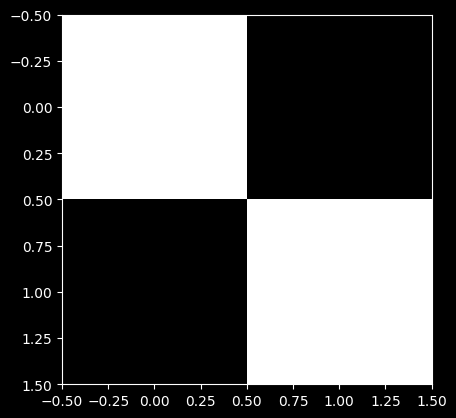

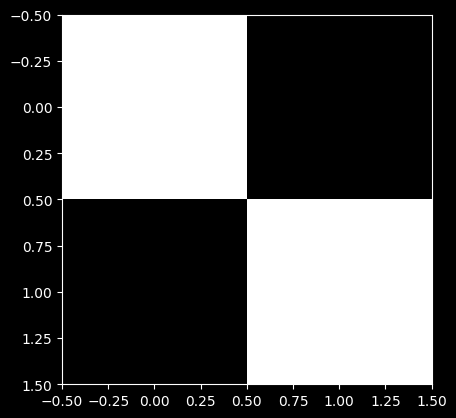

In [67]:
data = "0222112222120000"
expected = [
    [0, 1],
    [1, 0],
]


def decode(wide: int, tall: int, data: str) -> list[list[int]]:
    ls = layers(wide, tall, data)
    final_image = [[0] * wide for _ in range(tall)]
    n = len(ls)

    for t, w in product(range(tall), range(wide)):
        layer = 0

        while layer < n and ls[layer][t][w] == 2:
            layer += 1

        final_image[t][w] = ls[layer][t][w]

    return final_image


plt.imshow(expected, cmap="binary")
plt.show()
plt.imshow(decode(2, 2, data), cmap="binary")
plt.show()

Part II: CYUAH


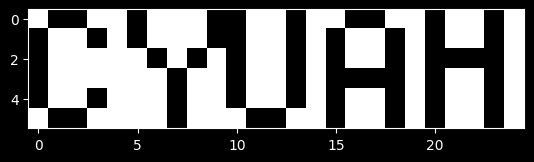

In [68]:
plt.imshow(decode(25, 6, puzzle), cmap="binary")
print(f"Part II: CYUAH")

<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>CYUAH</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>

</main>
